# **Research Problem**
It is figure out how we can predict which individuals are most likely to have or use a bank account.

# **Success Metric**
### In order to succefully define the metric of success the main objectives are as follows
1.To find the age groups of the individuals to start solving the financial inclusion question.

2.To find the job type of the individuals.

**Loading the libraries**

In [22]:
#Ill first import pandas for analysis and organisation
import pandas as pd
#Ill then import numpy for calculation
import numpy as np
#Ill import seaborn for data visualisation
import seaborn as sns
#Ill import matplotlib for conducting analysis
import matplotlib.pyplot as plt

%matplotlib inline

import sklearn as sk
from pandas_profiling import ProfileReport
from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import pandas.util.testing as tm
import warnings

warnings.filterwarnings('ignore')

In [6]:
#Ill then preview my dataset by loading it. First 9 rows
df = pd.read_csv("http://bit.ly/FinancialDataset")
df.head(10)


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


# Exploring the dataset


In [8]:
#Ill check the type of the dataset
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [10]:
#ILl then check the shape of the dataset
df.shape
#13 columns and 23524 rows

(23524, 13)

In [11]:
#Ill then preview the columns of the dataset
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

# Data analysis


In [24]:
#Ill first check if their is any duplicate values.
df.duplicated().sum()
#No duplicated values

0

In [26]:
#Ill then check for missing values in the dataset.
df.isnull().sum().sum()
#Dataset has over 267 missing values.

267

In [28]:
#Ill then proceed to drop the missing values
df.dropna(inplace=True)
df.isnull().sum()
#Confirming if the missing values are dropped.

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [35]:
#Ill then drop unnecessary columns
dropping_columns = ['uniqueid','The relathip with head','marital_status','year']
df.drop(dropping_columns, axis=1, inplace=True)

In [38]:
#Ill then confirm if the columns are dropped
df.head()

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


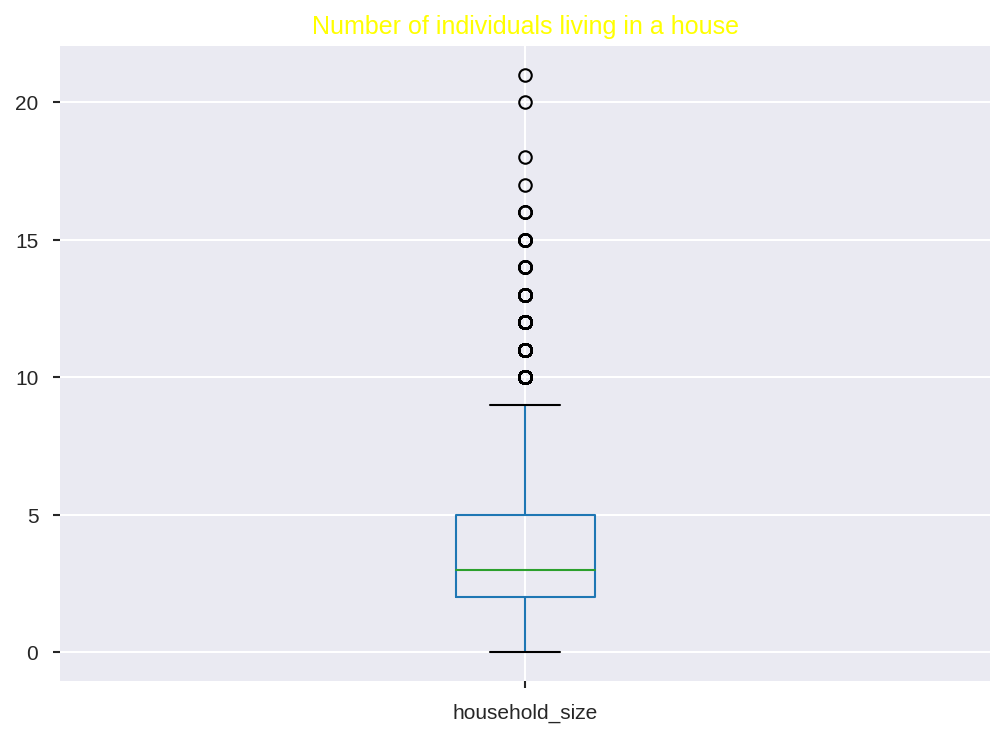

In [40]:
# Ill then checking for outliers on the variable (household_size) using boxplot
plt.figure(dpi = 150)
df.boxplot(['household_size'])
plt.title("Number of individuals living in a house", color = 'Yellow')
plt.show()


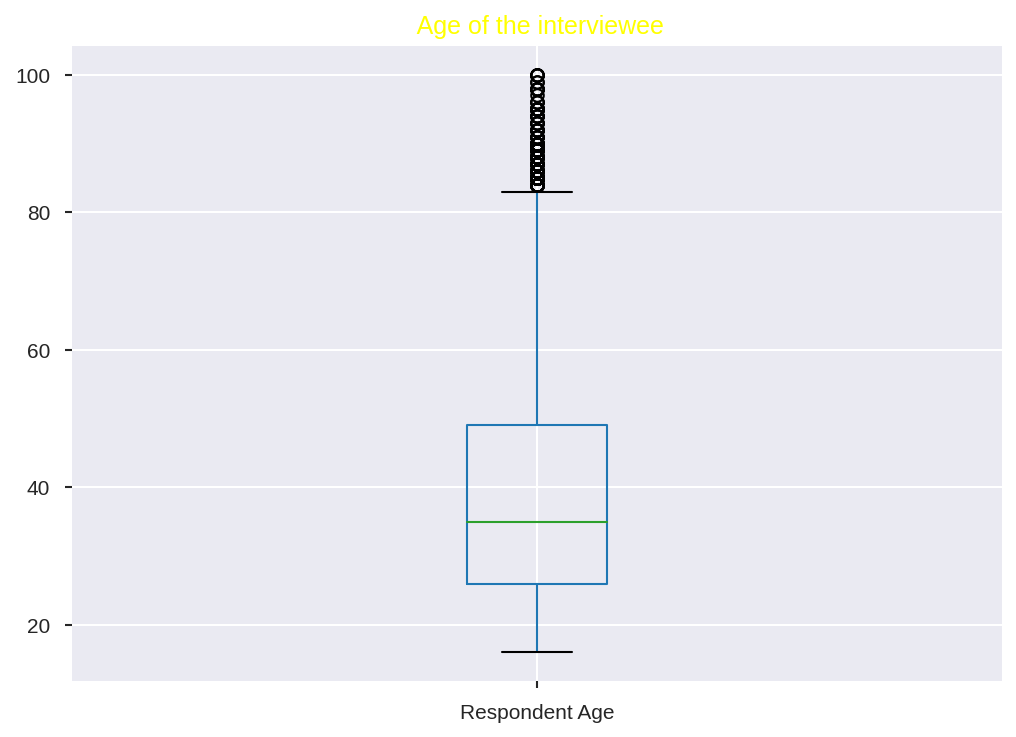

In [34]:
#Ill also check for outliers in the age of the interviewee
plt.figure(dpi = 150)
df.boxplot(['Respondent Age'])
plt.title(" Age of the interviewee", color = 'yellow')
plt.show()


# *Univariative analysis*

Central Tendacy

In [42]:
#Ill use the concept of central tendacy to get a summary of the dataset
mean_age = df['Respondent Age'].mean()
print('mean age: %.2f' % mean_age)

mean_household_size = df['household_size'].mean()
print('mean household size: %.2f' % mean_household_size)

mode_age = df['Respondent Age'].mode()
print('mode respondent age: %.0f' % mode_age)

mode_household_size = df['household_size'].mode()
print('mode household size: %d' % mode_household_size)

median_age = df['Respondent Age'].median()
print('median age of respondents: %d' % median_age)

median_household_size = df['household_size'].median()
print('median household size: %d' %median_household_size)

mean age: 38.81
mean household size: 3.69
mode respondent age: 30
mode household size: 2
median age of respondents: 35
median household size: 3


Dispersion




In [47]:
# Ill use dispersion to get a clear idea of the distribution of data

# std
age = df['Respondent Age'].std()
print('Standard deviation in respondents\' age: {:.3f}' .format(age))

# variance
Variance= df['Respondent Age'].var()
print('Variance in respondents\' age: {:.3f}' .format(Variance))

# range of age

age_max = df['Respondent Age'].max()
age_min = df['Respondent Age'].min()

range_age = age_max - age_min
print('Range of respondents\' age: {}' .format(range_age))

# quartiles of age
quartiles = df['Respondent Age'].quantile([0.25,0.5,0.75])
print('first, second and third quartiles: \n{}'.format(quartiles))

# skewness
age_skew = df['Respondent Age'].skew()
print('Skewness in respondents\' age: {:.3f}' .format(age_skew))

# kurtosis
age_kurt = df['Respondent Age'].kurt()
print('Kurtosis in respondent age: {:.3f}'.format(age_kurt))


Standard deviation in respondents' age: 16.520
Variance in respondents' age: 272.904
Range of respondents' age: 84.0
first, second and third quartiles: 
0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent Age, dtype: float64
Skewness in respondents' age: 0.841
Kurtosis in respondent age: 0.098


Visualising the findings

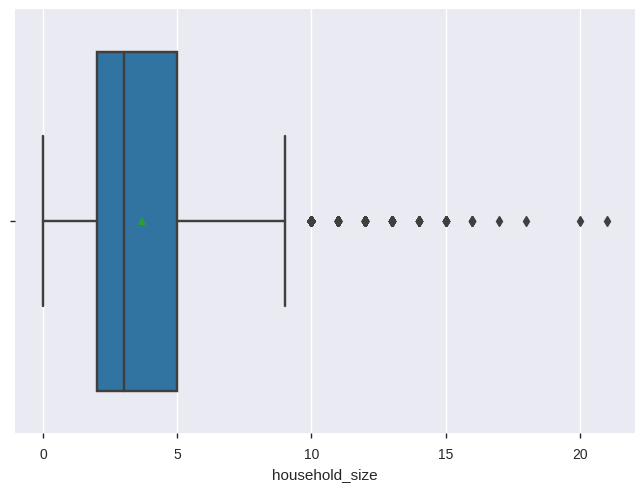

In [49]:
#Ill then plot the univariative summary 
sns.boxplot(df['household_size'], showmeans=True)

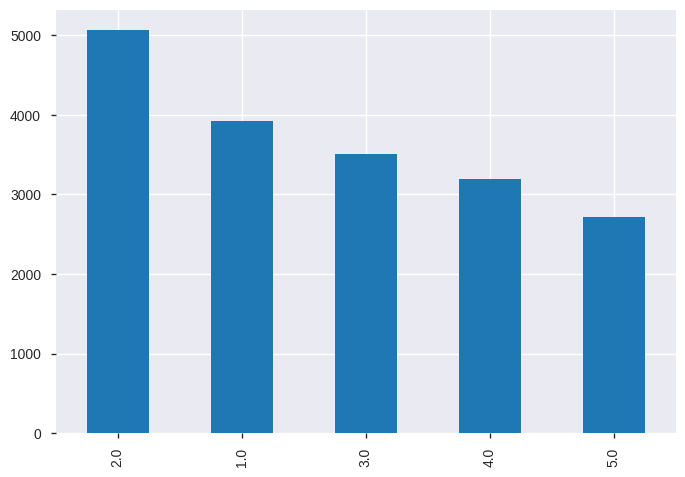

In [50]:
df['household_size'].value_counts().head().plot.bar()


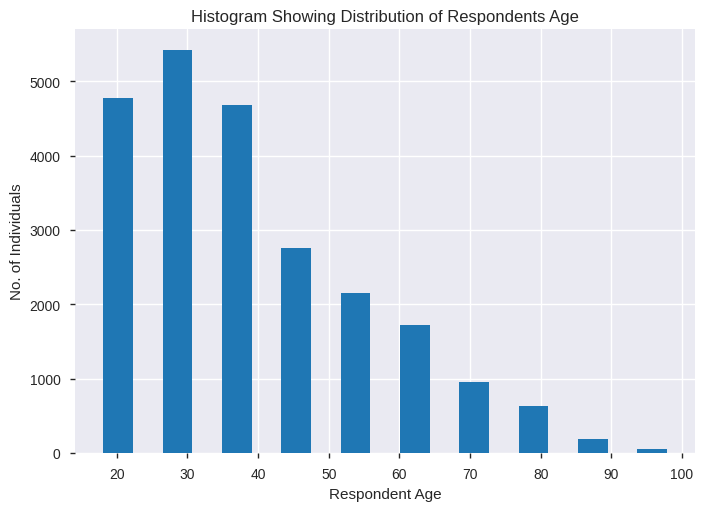

In [52]:
#Ill then plot a histogram showing the reponents age
plt.hist(df['Respondent Age'], bins=10, histtype='bar', rwidth=0.5)
plt.xlabel('Respondent Age')
plt.ylabel('No. of Individuals')
plt.title('Histogram Showing Distribution of Respondents Age')
plt.show()


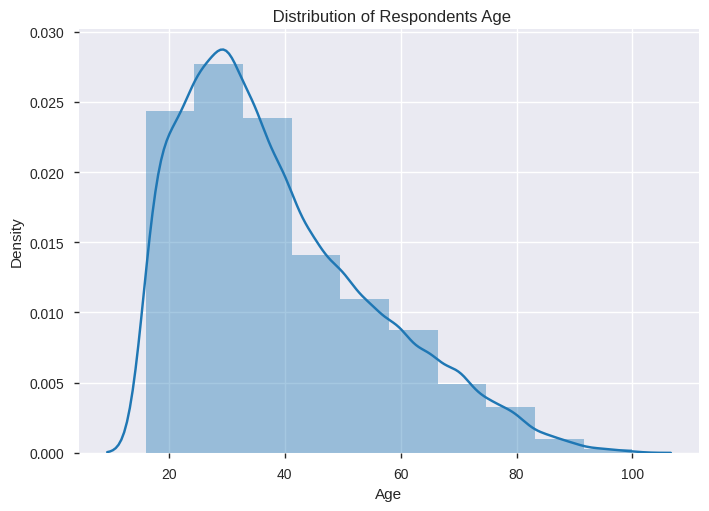

In [55]:
#Ill then use seaborn to plot a histogramof the respondent age
sns.distplot(df['Respondent Age'], bins=10, axlabel='Age')
plt.title(' Distribution of Respondents Age')
plt.show()

Bivariative Analysis

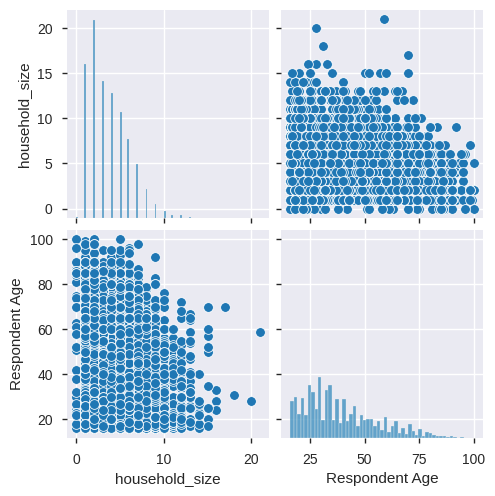

In [56]:
#Ill then plot the bivariative summary using pairplot
sns.pairplot(df)
plt.show()

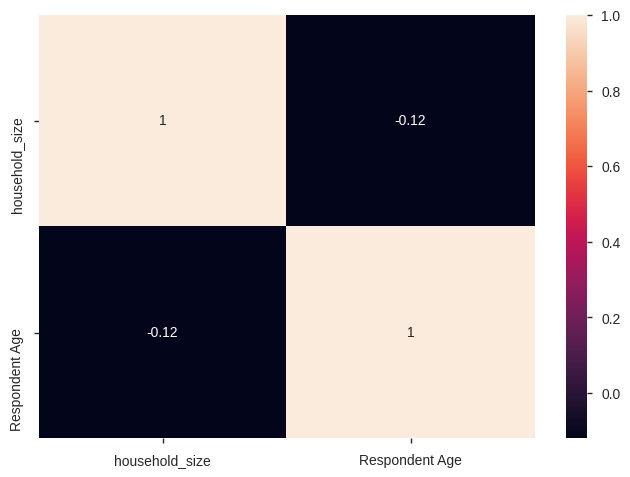

In [57]:
#Ill then use a heat map to show the coarelation of the variables
sns.heatmap(df.corr(),annot=True)
plt.show()
#Negative coarelation found

Multivariate analysis

In [67]:
#Ill use the get dummie function
multi = pd.get_dummies(df)
multi.head()

,household_size,Respondent Age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,Has a Bank account_No,Has a Bank account_Yes,Type of Location_Rural,Type of Location_Urban,Cell Phone Access_No,Cell Phone Access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,Level of Educuation_6,Level of Educuation_No formal education,Level of Educuation_Other/Dont know/RTA,Level of Educuation_Primary education,Level of Educuation_Secondary education,Level of Educuation_Tertiary education,Level of Educuation_Vocational/Specialised training,Type of Job_Dont Know/Refuse to answer,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,3.0,24.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,5.0,70.0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,5.0,34.0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,8.0,26.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


### **PCA**

In [68]:
df.head()

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['household_size', 'Respondent Age']])
scaled_data = scaler.transform(df[['household_size', 'Respondent Age']])

In [71]:
scaled_data = pd.DataFrame(scaled_data)


In [72]:
df2 = scaled_data.fillna(0)
df2.head()

,0,1
0,-0.301886,-0.896247
1,0.574870,1.888349
2,0.574870,-0.775178
3,0.574870,-0.290900
4,1.890005,-0.775178


In [73]:
from sklearn.decomposition import PCA
logmodel = PCA(n_components=2)
logmodel.fit(df2)
pca_x = logmodel.transform(df2)

Text(0.5, 0, 'First Principle Component ')

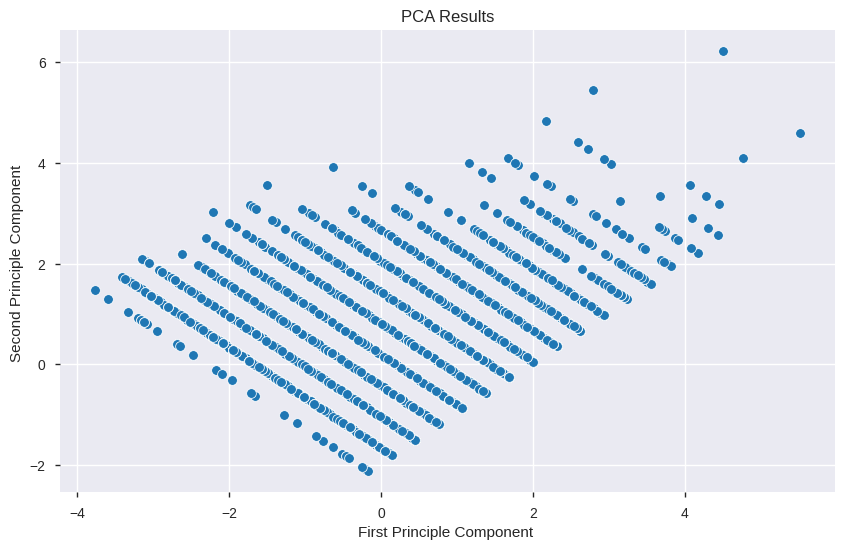

In [74]:
plt.figure(figsize=(10,6))
ty=sns.scatterplot(pca_x[:,0], pca_x[:,1])
sns.despine(left=True)
ty.set_title('PCA Results')
ty.set_ylabel('Second Principle Component ')
ty.set_xlabel('First Principle Component ')

**Recommendation**

From the avobe analysis we can concur that older individuals have bank accounts. This is from the overall analysis especially from the unvariative analysis

***Conclusion***

Using PCA for dimeanisonality reduction, we can correctly predict individuals with or without bank accounts. 